In [1]:
!pip install -q kaggle


In [8]:
!mkdir -p /root/.config/kaggle
!echo '{"username":"your_username","key":"secret_key"}' > /root/.config/kaggle/kaggle.json
!chmod 600 /root/.config/kaggle/kaggle.json


In [9]:
!cat /root/.config/kaggle/kaggle.json


{"username":"your_username","key":"secret_key"}


In [10]:
!kaggle datasets list


ref                                                   title                                           size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------  ----------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                              Heart Disease                                   3491  2025-12-11 15:29:14.327000           2114        129  1.0              
wardabilal/spotify-global-music-dataset-20092025      Spotify Global Music Dataset (2009–2025)     1289021  2025-11-11 09:43:05.933000          16387        462  1.0              
neurocipher/student-performance                       Student Performance                            49705  2025-12-12 12:06:28.973000           1261         92  1.0              
suvidyasonawane/student-performance-dataset           Student Performance Dataset                   

In [12]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 68% 149M/218M [00:00<00:00, 1.56GB/s]
100% 218M/218M [00:00<00:00, 1.02GB/s]


In [13]:
!unzip cat-and-dog.zip


Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [14]:
!ls


cat-and-dog.zip  sample_data  test_set	training_set


In [16]:
!ls .


cat-and-dog.zip  sample_data  test_set	training_set


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



In [21]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [27]:
train_data = train_datagen.flow_from_directory(
    'training_set/training_set',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    'test_set/test_set',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [28]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [30]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.5517 - loss: 0.8617 - val_accuracy: 0.6520 - val_loss: 0.6227
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.7186 - loss: 0.5601 - val_accuracy: 0.6416 - val_loss: 0.6328
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.7836 - loss: 0.4601 - val_accuracy: 0.7187 - val_loss: 0.5649
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.8612 - loss: 0.3291 - val_accuracy: 0.7197 - val_loss: 0.6537
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - accuracy: 0.9155 - loss: 0.2047 - val_accuracy: 0.7281 - val_loss: 0.7322
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.9665 - loss: 0.1030 - val_accuracy: 0.7286 - val_loss: 0.9028
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 15s 59ms/step - accuracy: 0.9826 - loss: 0.0568 - val_accuracy: 0.7286 - val_loss: 1.1771
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.9949 - loss: 0.0271 - val_accurac

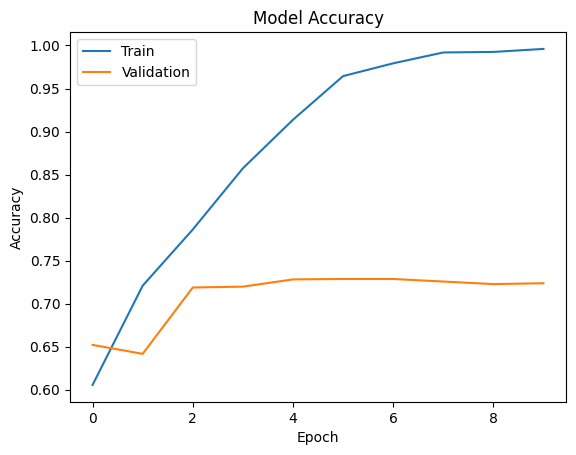

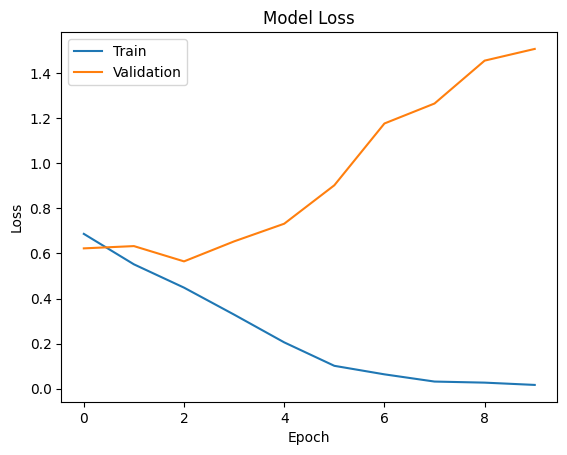

In [31]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
